In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

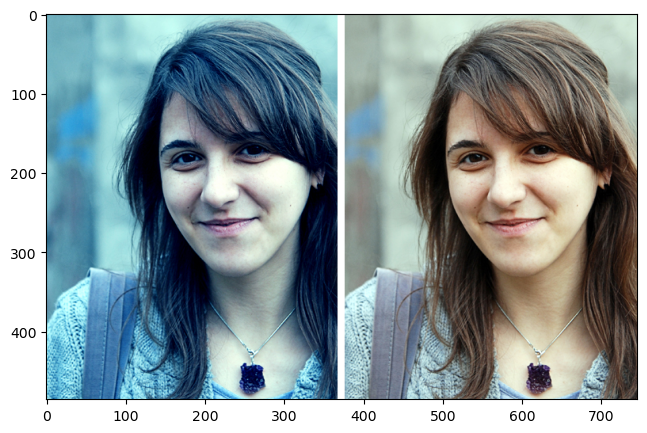

In [31]:
img = cv2.imread('619.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x15df7cabcd0>)

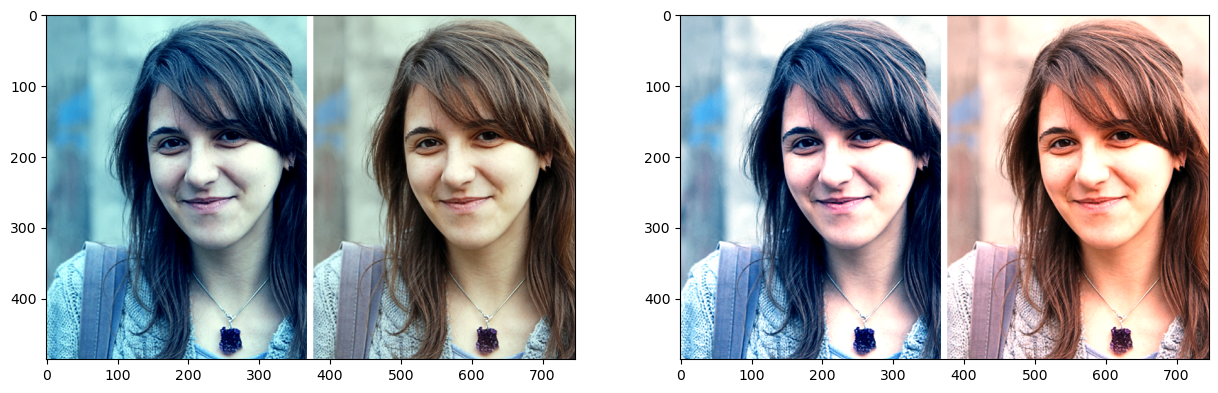

In [35]:
# Define white patch and the coefficients
row, col = 40, 340 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x15df68afc90>)

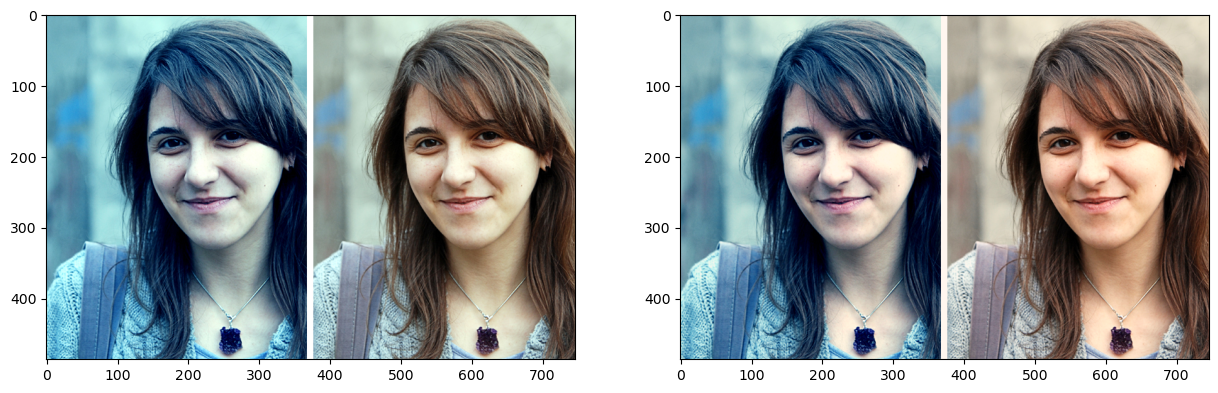

In [34]:
# Load your image
img = cv2.imread('619.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_red = np.mean(red);
mean_green = np.mean(green);
mean_blue = np.mean(blue);

mean_gray = (mean_red + mean_green + mean_blue)/3 

red = red * (mean_gray/mean_red)
green = green * (mean_gray/mean_green)
blue = blue * (mean_gray/mean_blue)   

# Apply color balancing and generate the balanced image
balanced = cv2.merge([red, green, blue])
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x15d815be510>)

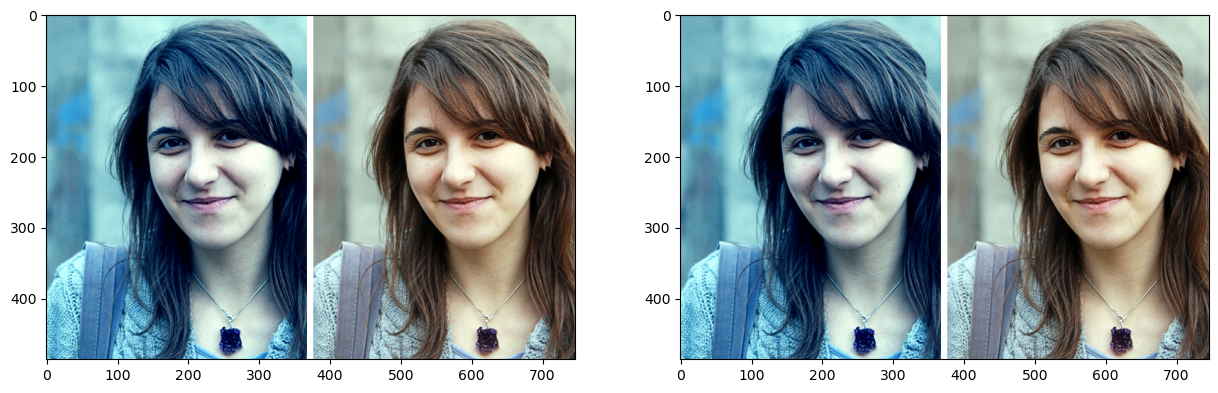

In [50]:
# Load your image
img = cv2.imread('619.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(red) + 1e-6 #додаємо маленьке число на випадок, якщо картинка повністю чорна
max_g = np.max(green) + 1e-6
max_b = np.max(blue) + 1e-6

# Apply scale-by-max balancing and generate the balanced image

red = red * (255.0/max_r)
green = green * (255.0/max_g)
blue = blue * (255.0/max_b)  

balanced = cv2.merge([red, green, blue])
balanced = balanced.astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)